In [38]:
import utils
import plotting
import numpy as np
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [59]:
samples = {
    "QCD": "QCD",
    "Single Top": "ST",
    "TTSL": "TTToSemiLeptonic",
    "TTbar": ["TTTo2L2Nu", "TTToHadronic"],
    "W+Jets": "WJets",
    "Diboson": ["WW", "WZ", "ZZ"],
    "Data": "SingleMuon",
}

data_dir = "../../../../data/ttsfs/"
year = "2017"

# filters = [("('ak8FatJetPt', '0')", ">=", 500)]
filters = None

events_dict = utils.load_samples(data_dir, samples, year, filters=filters)

Finding QCD samples
Loading QCD_Pt_3200toInf
Loaded 0 entries
Loading QCD_Pt_1800to2400
Loaded 0 entries
Loading QCD_Pt_2400to3200
Loaded 1 entries
Loading QCD_Pt_1000to1400
Loaded 0 entries
Loading QCD_Pt_600to800
Loaded 0 entries
Loading QCD_Pt_300to470
Loaded 243 entries
Loading QCD_Pt_170to300
Loaded 0 entries
Loading QCD_Pt_800to1000
Loaded 127 entries
Loading QCD_Pt_470to600
Loaded 0 entries
Loading QCD_Pt_1400to1800
Loaded 0 entries
Finding Single Top samples
Loading ST_tW_antitop_5f_NoFullyHadronicDecays
Loaded 7273 entries
Loading ST_tW_top_5f_NoFullyHadronicDecays
Loaded 7422 entries
Loading ST_tW_top_5f_inclusiveDecays
Loaded 2700 entries
Loading ST_tW_antitop_5f_inclusiveDecays
Loaded 2607 entries
Loading ST_s-channel_4f_leptonDecays
Loaded 3309 entries
Finding TTSL samples
Loading TTToSemiLeptonic
Loaded 127839 entries
Loading TTToSemiLeptonic_ext1
Loaded 33194 entries
Finding TTbar samples
Loading TTTo2L2Nu
Loaded 82688 entries
Loading TTToHadronic
Loaded 328 entries
Find

In [63]:
events_dict["TT Top Matched"] = events_dict["TTSL"].loc[events_dict["TTSL"]["top_matched"][0] == 1]
events_dict["TT W Matched"] = events_dict["TTSL"].loc[events_dict["TTSL"]["w_matched"][0] == 1]
events_dict["TT Unmatched"] = pd.concat([events_dict["TTbar"], events_dict["TTSL"].loc[events_dict["TTSL"]["unmatched"][0] == 1]])
del events_dict["TTSL"]
del events_dict["TTbar"]

In [64]:
for key in events_dict:
    events_dict[key] = events_dict[key][events_dict[key]["ak8FatJetPt"][0] >= 500]

In [67]:
mass_hist = utils.singleVarHistNoMask(
    events_dict, "ak8FatJetMass", [20, 125, 225], r"$m_{SD}$", weight_key="weight"
)

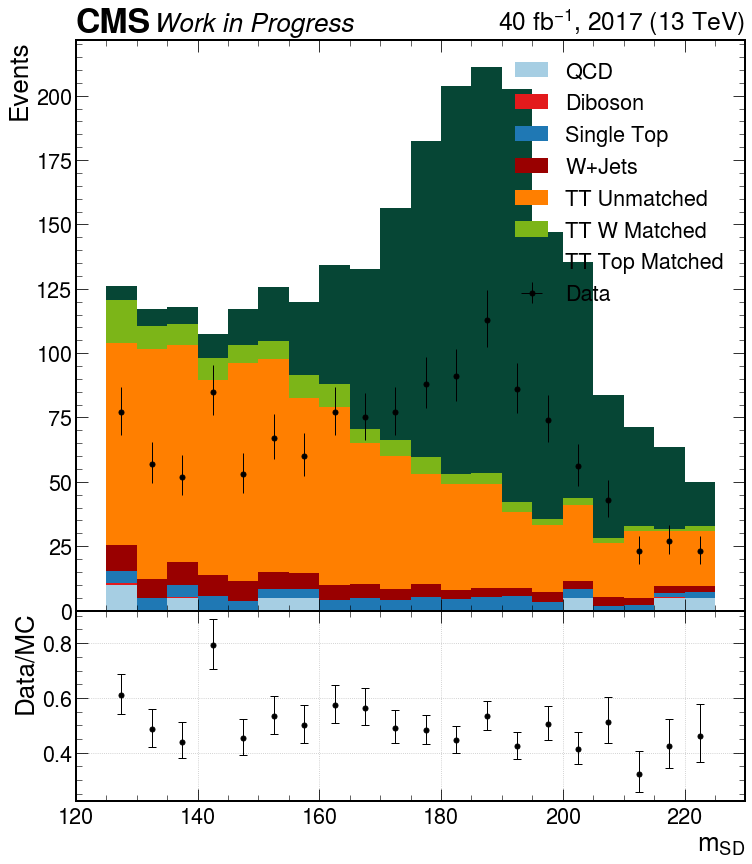

In [68]:
plotting.ratioHistPlot(
    mass_hist,
    ["QCD", "Diboson", "Single Top", "W+Jets", "TT Unmatched", "TT W Matched", "TT Top Matched"],
)